<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_8_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.048444,91.831350,97.596089,-32.890703,244.585181,276.805613,-32.220432
1,0.0,1.0,45.851362,86.769215,96.059515,-40.198339,198.481752,234.166259,-35.684507
2,0.0,2.0,75.049666,93.730953,55.710068,-29.888287,204.602400,222.367155,-17.764755
3,0.0,3.0,62.943601,24.098759,91.283456,9.569258,197.895075,197.439669,0.455406
4,0.0,4.0,55.348104,49.686755,32.176677,-23.940104,123.271432,135.137291,-11.865860
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.386075,82.429700,46.226158,12.277067,193.319000,161.400693,31.918307
19996,999.0,16.0,60.544786,32.149069,26.157401,-12.660803,116.190453,125.844993,-9.654541
19997,999.0,17.0,42.742809,86.725664,40.049952,0.877972,180.396398,158.072978,22.323420
19998,999.0,18.0,97.010707,34.891688,37.682793,3.508470,183.093657,184.344601,-1.250943


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.048444,91.831350,97.596089,-32.890703,244.585181,276.805613,-32.220432
1,0.0,1.0,45.851362,86.769215,96.059515,-40.198339,198.481752,234.166259,-35.684507
2,0.0,2.0,75.049666,93.730953,55.710068,-29.888287,204.602400,222.367155,-17.764755
3,0.0,3.0,62.943601,24.098759,91.283456,9.569258,197.895075,197.439669,0.455406
4,0.0,4.0,55.348104,49.686755,32.176677,-23.940104,123.271432,135.137291,-11.865860
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.386075,82.429700,46.226158,12.277067,193.319000,161.400693,31.918307
19996,999.0,16.0,60.544786,32.149069,26.157401,-12.660803,116.190453,125.844993,-9.654541
19997,999.0,17.0,42.742809,86.725664,40.049952,0.877972,180.396398,158.072978,22.323420
19998,999.0,18.0,97.010707,34.891688,37.682793,3.508470,183.093657,184.344601,-1.250943


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.048444,91.831350,97.596089,-32.890703,244.585181,276.805613,-32.220432
1,0.0,1.0,45.851362,86.769215,96.059515,-40.198339,198.481752,234.166259,-35.684507
2,0.0,2.0,75.049666,93.730953,55.710068,-29.888287,204.602400,222.367155,-17.764755
3,0.0,3.0,62.943601,24.098759,91.283456,9.569258,197.895075,197.439669,0.455406
4,0.0,4.0,55.348104,49.686755,32.176677,-23.940104,123.271432,135.137291,-11.865860
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.386075,82.429700,46.226158,12.277067,193.319000,161.400693,31.918307
19996,999.0,16.0,60.544786,32.149069,26.157401,-12.660803,116.190453,125.844993,-9.654541
19997,999.0,17.0,42.742809,86.725664,40.049952,0.877972,180.396398,158.072978,22.323420
19998,999.0,18.0,97.010707,34.891688,37.682793,3.508470,183.093657,184.344601,-1.250943


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

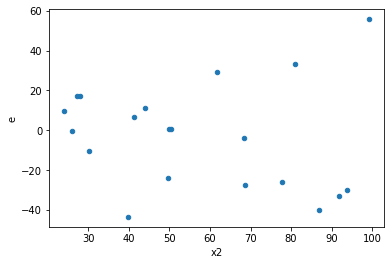

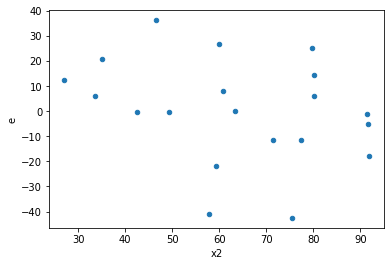

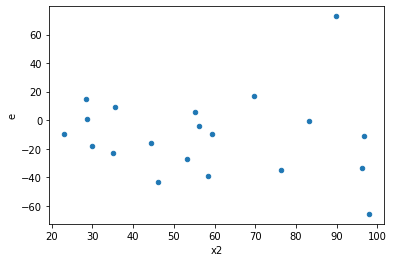

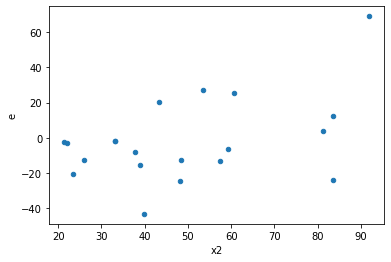

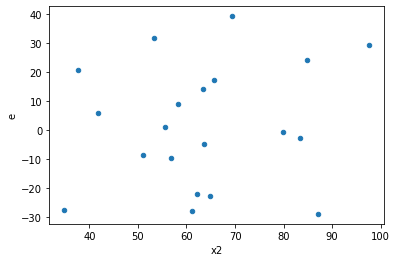

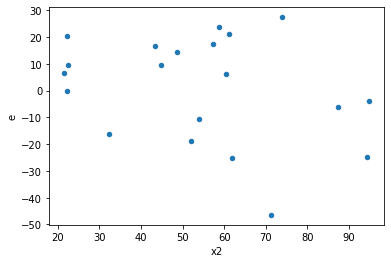

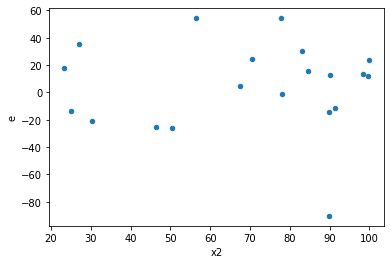

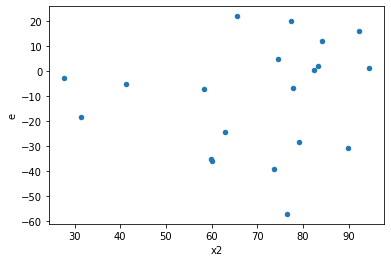

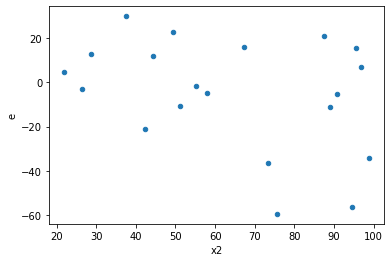

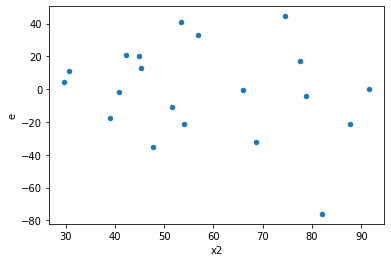

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,7960.348274163931,1471.757699689437,1990.0870685409827,367.93942492235925,5.408735606305089,0.08756767145900013,0.9562161642704999,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,2067.048217529827,945.9913367335448,516.7620543824568,236.4978341833862,2.1850604093978583,0.4111542703749118,0.7944228648125441,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,10325.80025899719,1302.0196267621375,2581.4500647492973,325.50490669053437,7.930602616702016,0.04023746417581098,0.9798812679120945,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2652.33646852504,340.9519499661924,663.08411713126,85.2379874915481,7.779208972959491,0.04190065664966358,0.9790496716751682,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,3146.90526482653,2178.7381890321126,786.7263162066325,544.6845472580281,1.444370544688767,0.6964522833560265,0.6517738583219868,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3233.2686455100934,330.115639067584,808.3171613775233,82.528909766896,9.794351623699209,0.025615931070483544,0.9871920344647582,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,5708.791126545007,1937.9204015247474,1427.1977816362516,484.48010038118684,2.9458336483032816,0.2607901392335745,0.8696049303832127,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,4487.621703760806,2251.5454038011258,1121.9054259402014,562.8863509502814,1.9931295616711393,0.46720165672830527,0.7663991716358474,Reject001=1 : Homoscedasticity
11.0,5.0,5.0,4419.908528727404,776.9216141332842,1104.977132181851,194.23040353332104,5.68900188683533,0.07929859183555976,0.9603507040822201,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,7960.348274163931,1471.757699689437,1990.0870685409827,367.93942492235925,5.408735606305089,0.08756767145900013,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,2067.048217529827,945.9913367335448,516.7620543824568,236.4978341833862,2.1850604093978583,0.4111542703749118,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,10325.80025899719,1302.0196267621375,2581.4500647492973,325.50490669053437,7.930602616702016,0.04023746417581098,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2652.33646852504,340.9519499661924,663.08411713126,85.2379874915481,7.779208972959491,0.04190065664966358,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,3146.90526482653,2178.7381890321126,786.7263162066325,544.6845472580281,1.444370544688767,1.3035477166439735,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,3233.2686455100934,330.115639067584,808.3171613775233,82.528909766896,9.794351623699209,0.025615931070483544,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1687.7664931363975,5907.64734608515,421.94162328409936,1476.9118365212876,0.2856918150767476,0.19536796081833216,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,868.83684736481,1252.2329916710064,217.2092118412025,313.0582479177516,0.6938300245591004,0.6981273773920613,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,5708.791126545007,1937.9204015247474,1427.1977816362516,484.48010038118684,2.9458336483032816,0.2607901392335745,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      881
Reject001=0 : Heteroscedasticity    119
Name: Result_test, dtype: int64